In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("/content/diabetes.csv")
#print(dataset.head(3))

In [3]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
#print(x)

In [4]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])
#print(x)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
#print(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)
#print(y_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(2,activation='softmax')
])


In [93]:

# model = Sequential([
#     Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
#     Dense(1, activation='sigmoid')  # For binary classification
# ])
# # Train the model
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.utils.class_weight import compute_class_weight
# classes = np.unique(y_train)
# class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
# class_weight_dict = dict(zip(classes, class_weights))
# model.compile(optimizer=RMSprop(learning_rate=0.005),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32,
#           class_weight=class_weight_dict, callbacks=[lr_scheduler])
# # Evaluate the model
# y_pred = (model.predict(x_test) > 0.5).astype(int)
# print("Classification Report:\n", classification_report(y_test, y_pred))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import numpy as np

# Define the model with additional optimizations
model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation=None),  # No activation for input layer
    BatchNormalization(),
    LeakyReLU(alpha=0.01),  # LeakyReLU to prevent dead neurons
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation=None),  # Second hidden layer
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compute class weights to handle class imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Compile the model with Adam optimizer and BinaryFocalCrossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0037),
              loss=BinaryFocalCrossentropy(gamma=2.0),  # Focal loss for imbalanced data
              metrics=['accuracy'])

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model with class weights and callbacks
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[lr_scheduler])

# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype(int)  # Threshold at 0.5 for sigmoid outputs
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5702 - loss: 0.2546 - val_accuracy: 0.7468 - val_loss: 0.1427 - learning_rate: 0.0037
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.1734 - val_accuracy: 0.7597 - val_loss: 0.1385 - learning_rate: 0.0037
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7016 - loss: 0.1698 - val_accuracy: 0.7273 - val_loss: 0.1407 - learning_rate: 0.0037
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7010 - loss: 0.1498 - val_accuracy: 0.7597 - val_loss: 0.1383 - learning_rate: 0.0037
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.1401 - val_accuracy: 0.7662 - val_loss: 0.1340 - learning_rate: 0.0037
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6748 - loss: 0.1568 - val_accuracy: 0.7727 - val_loss: 0.1339 - learning_rate: 0.0037
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7380 - loss: 0.1511 - val_accuracy: 0.7532 - v

In [94]:
history=model.fit(x_train,y_train,epochs=100)
history =model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.1284
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.1299 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.1229 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.1247 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.1289 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7367 - loss: 0.1395
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.1337 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.1231 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7387 - loss: 0.1285
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.1401
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7435 - loss: 0.1374
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

prediction

In [95]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"loss:{loss},accuracy:{accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.1198 
loss:0.1272163838148117,accuracy:0.798701286315918


In [96]:
predictions=model.predict(x_test)
predictions=(predictions>0.5).astype(int).flatten()
#print(predictions)
model.save('diabetes.h5')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Confusion Matrix Summary:
True Negatives (TN): 78
False Positives (FP): 21
False Negatives (FN): 10
True Positives (TP): 45

Accuracy: 0.80
Precision: 0.68
Recall: 0.82
F1-Score: 0.74
154 154


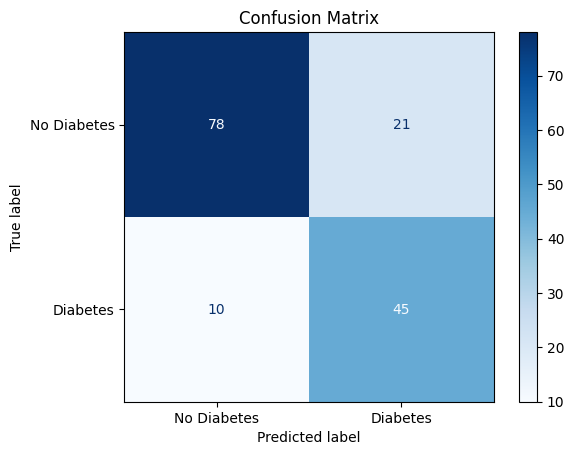

In [97]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Compute confusion matrix
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
# Extract confusion matrix components
tn, fp, fn, tp = cm.ravel()
# Compute metrics
accuracy = accuracy_score(y_test, (predictions > 0.5).astype(int))
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
# Print summary
print("Confusion Matrix Summary:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}\n")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
predictions=predictions[:len(y_test)]
from sklearn.calibration import calibration_curve
print(len(y_test),len(predictions))
#Compute calibration curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))  # Thresholding at 0.5
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()






